In [231]:
!pip3 install -q ultralytics

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [232]:
from ultralytics import YOLO

In [233]:
import torch
gismodel = YOLO("verison3/last.pt")

In [269]:
import torch
from torchvision import transforms
from PIL import Image

# Define transformations
transform = transforms.Compose([
    transforms.Resize((800, 800)),  # Resize image to 800x800
    # transforms.Pad((0, 0, 0, 0), fill=(255, 255, 255), padding_mode='edge'),  # Add back borders with white color
    transforms.ToTensor(),  # Convert image to tensor
])

# Load and preprocess input image
image = Image.open("test_images/test7.jpg")  # Replace "input_image.jpg" with your image path
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
input_tensor.shape

torch.Size([1, 3, 800, 800])

In [267]:
pred = gismodel.predict(input_tensor)


0: 800x800 2 buildingss, 2 extras, 9 treess, 323.5ms
Speed: 0.0ms preprocess, 323.5ms inference, 19.0ms postprocess per image at shape (1, 3, 800, 800)


In [236]:
import matplotlib.pyplot as plt

(-0.5, 799.5, 799.5, -0.5)

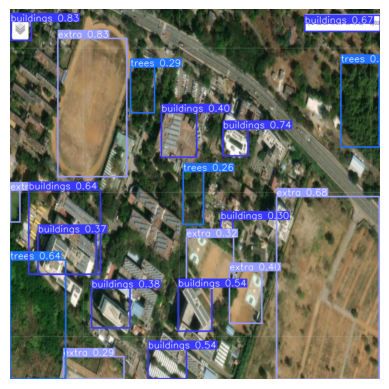

In [237]:
plt.imshow(pred[0].plot())
plt.axis("off")

In [238]:
int(pred[0].boxes.cls[0])

0

0 = building
1 = extra
2 = trees

In [250]:
pred[0].names[cls]

'trees'


0: 800x800 46 buildingss, 9 extras, 12 treess, 428.8ms
Speed: 0.0ms preprocess, 428.8ms inference, 5.7ms postprocess per image at shape (1, 3, 800, 800)


Trees area m²: 69584.18
Building area m²: 188803.72
Extra area m²: 63775.24


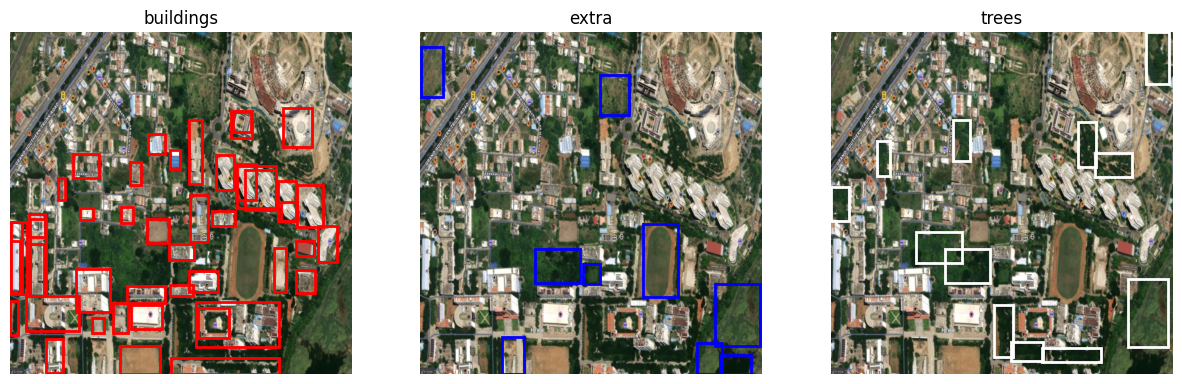

In [274]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


import torch
from torchvision import transforms
from PIL import Image

# Define transformations
transform = transforms.Compose([
    transforms.Resize((800, 800)),  # Resize image to 800x800
    # transforms.Pad((0, 0, 0, 0), fill=(255, 255, 255), padding_mode='edge'),  # Add back borders with white color
    transforms.ToTensor(),  # Convert image to tensor
])


# Load and preprocess input image
image = Image.open("test_images/test8.jpg")  # Replace "input_image.jpg" with your image path
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension



pred = gismodel.predict(input_tensor)

# Assuming 'input_tensor' is your input image tensor
# Assuming 'pred' contains the predicted bounding box coordinates

# Convert the input tensor to numpy array and transpose it to (height, width, channels)
input_image = input_tensor.squeeze().permute(1, 2, 0).cpu().numpy()

# Create subplots for each class
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.ravel()

building_area = 0
trees_area = 0
extra_area = 0

scale = 100

for cls in range(3):
    # Set the title of the subplot to the class name
    axs[cls].set_title(pred[0].names[cls])
    axs[cls].imshow(input_image)
    axs[cls].axis("off")
    ax = axs[cls]

    for idx, box in enumerate(pred[0].boxes.xywh):
        if int(pred[0].boxes.cls[idx]) == cls:

            x_center, y_center, width, height = box
            xmin = x_center - width / 2
            ymin = y_center - height / 2
            xmax = x_center + width / 2
            ymax = y_center + height / 2
            
            # Create a Rectangle patch
            if cls == 0:
                rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
            elif cls == 1:
                rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='b', facecolor='none')
            else:
                rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='w', facecolor='none')

            pixel_to_meter = 0.01 * scale
            area_in_meters_squared = (width * pixel_to_meter) * (height * pixel_to_meter)
            # ax.text(xmin, ymin, f'{area_in_meters_squared:.2f} m²', fontsize=10, color='w')

            if cls == 0:
                building_area += area_in_meters_squared
            elif cls == 1:
                extra_area += area_in_meters_squared
            else:
                trees_area += area_in_meters_squared

            ax.add_patch(rect)

# Show the areas
print(f"Trees area m²: {trees_area:.2f}")
print(f"Building area m²: {round(float(building_area), 2)}")
print(f"Extra area m²: {round(float(extra_area), 2)}")

plt.show()


In [ ]:
# 4000 m2 = 747
# 1 m2 = 0.18

In [257]:
trees_area * 0.18

tensor(632.9161)

In [258]:
(trees_area + extra_area) * 0.18

tensor(2414.9495)

In [262]:
(2414.9495 / 632.9161) * 100 

381.55918296279714